# Modelo Ross-Macdonald.

 Plantea un modelo **SIR - SI** donde se divide a la población en:

 * Humanos susceptibles.
 * Humanos Infectados.
 * Humanos Recuperados.

 y por el lado de los mosquitos:

 * Mosquitos susceptibles.
 * Mosquitos recuperados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Modelo.

Por problemas del minimize luego en la parte de búsqueda de parámetros, conviene reemplazar $(H_s + H_i + H_r)$ por $N_h$.

De lo contrario por el funcionamiento interno de minimize, cada uno de esos compartimentos decrece demasiado y termina dividiendo por cero.



In [2]:
def RossMacdonald_model(x,t):

    # Desarmamos el vector
    Hs, Hi, Hr, Vs, Vi = x

    # Planteamos las ecuaciones
    dHs_dt = lam_h - beta_h * Vi * Hs/(Hs + Hi + Hr) - mu_h * Hs
    dHi_dt = beta_h * Vi * Hs/(Hs + Hi + Hr) - (r_h + mu_h) * Hi
    dHr_dt = r_h * Hi - mu_h * Hs
    dVs_dt = lam_v - beta_v * Vs * Hi/(Hs + Hi + Hr) - mu_v * Vs
    dVi_dt = beta_v * Vs * Hi/(Hs + Hi + Hr) - mu_v * Vi

    return [dHs_dt, dHi_dt, dHr_dt, dVs_dt, dVi_dt]

Parámetros.

In [3]:
# Parameters
lam_h = 3.9e-05
lam_v = 0.10
mu_h = 0 #3.9e-05
mu_v = 0.10
r_h = 0.143
beta_h = 0.20
beta_v = 0.35


# Condiciones iniciales.

In [4]:
# Initial conditions

Nh = 1    # Total population
Nv = 1

Hi_0 = 1/1e6
Hs_0 = Nh - Hi_0
Hr_0 = 0

Vi_0 = 1/1e6
Vs_0 = Nv - Vi_0

x0 = [Hs_0, Hi_0, Hr_0, Vs_0, Vi_0] # Vector inicial

# Simulación del tiempo.

In [5]:
# Time solution -> Básicamente genera el eje x.
t_start = 0.0
t_end = 100.0
num_points = 10000
time_points = np.linspace(t_start, t_end, num_points) # Genera 1000 puntos entre 0 y 100 equiespaciados.

# Cálculo de soluciones.

In [6]:
sol = odeint(RossMacdonald_model, x0, time_points,rtol=1e-6, atol=1e-12)

Hs = sol[:, 0]
Hi = sol[:, 1]
Hr = sol[:, 2]
Vs = sol[:, 3]
Vi = sol[:, 4]

# Ploteo.

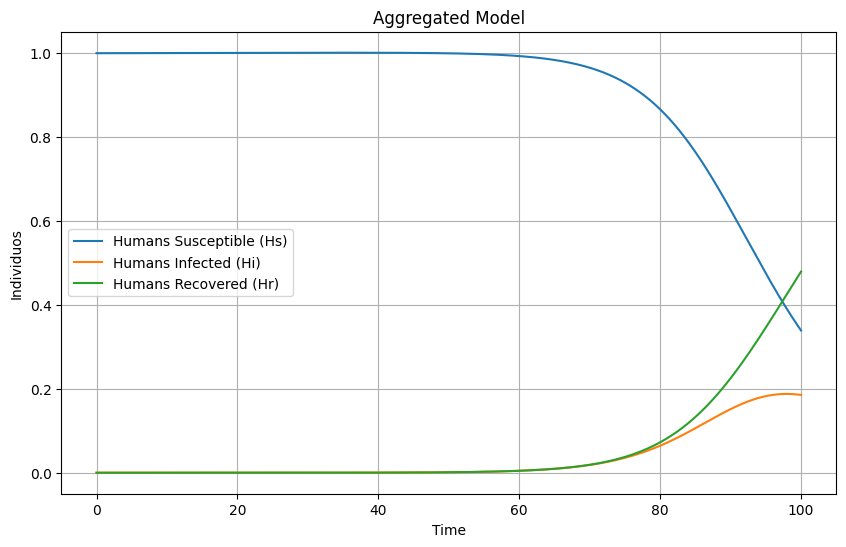

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(time_points, Hs, label='Humans Susceptible (Hs)')
plt.plot(time_points, Hi, label='Humans Infected (Hi)')
plt.plot(time_points, Hr, label='Humans Recovered (Hr)')
#plt.plot(time_points, Vs, label='Vector Susceptible (Vs)')
#plt.plot(time_points, Vi, label='Vector Infected (Vi)')
plt.title('Aggregated Model')
plt.xlabel('Time')
plt.ylabel('Individuos')
plt.grid(True)
plt.legend()
plt.show()